In [1]:
import jax
import jax.numpy as jnp
from gravpop import *
from gravpop_pipe import *
import matplotlib.pyplot as plt

import gwpopulation
gwpopulation.disable_cupy()

In [2]:
from gravpop_pipe import *
from gravpop import *
import jax
import jax.numpy as jnp

# Example usage:
filename = '/Users/asadh/Documents/Data/event_data2.h5'
selection_filename = '/Users/asadh/Documents/Data/selection_function2.h5'

SM = SmoothedTwoComponentPrimaryMassRatio(primary_mass_name="mass_1_source")
R = PowerLawRedshift()

I = InferenceStandard.from_file(
					event_data_filename = filename,
					selection_data_filename = selection_filename,
					models = [SM,R]
					)

In [3]:
new_data = I.event_data.copy()
new_data['mass_1'] = new_data['mass_1_source']
del new_data['mass_1_source']
M2 = gwpopulation.models.mass.SinglePeakSmoothedMassDistribution(normalization_shape=(200,100))
def my_model(data, params):
    
    return M2({'mass_1' : data['mass_1_source'], 'mass_ratio' : data['mass_ratio']}, 
            alpha = params['alpha'],
            lam = params['lam'],
            mmin = params['mmin'],
            mmax = params['mmax'],
            beta = params['beta'],
            mpp = params['mpp'],
            sigpp = params['sigpp'],
            delta_m =params['delta_m'])

In [4]:
##gwpop_posterior = I.event_data
I.event_data['mass_1'] = I.event_data['mass_1_source']
posteriors = [pd.DataFrame({key: val[i,:] for key,val in I.event_data.items()}) for i in range(69)]

In [17]:
M2 = gwpopulation.models.mass.SinglePeakSmoothedMassDistribution()

Lambda_0 = dict(
	alpha = 3.5,
    lam = 0.04,
    mmin = 5,
    mmax = 96,
    beta = 1.1,
    mpp = 35,
    sigpp = 4,
    delta_m = 3,
#    mu_1 = 0.4,
#    sigma_1 = 0.1,
#    mu_2 = 0.2,
#    sigma_2 = 0.1,
#    lamb = 2.9
)


Lambda_1 = dict(
	alpha = 3.5,
    lam = 0.4,
    mmin = 5,
    mmax = 96,
    beta = 2.1,
    mpp = 35,
    sigpp = 4,
    delta_m = 0.1,
#    mu_1 = 0.4,
#    sigma_1 = 0.1,
#    mu_2 = 0.2,
#    sigma_2 = 0.1,
#    lamb = 2.9
)

def my_model(data, params):
    return M2(data, **params)

In [18]:
compute_gwpop_like = lambda Lambda_0: jnp.sum(jnp.log((my_model(I.event_data, Lambda_0)/I.event_data["prior"]).mean(axis=-1))) \
- 69*jnp.sum(jnp.log((my_model(I.selection_data, Lambda_0)/I.selection_data["prior"]).mean(axis=-1)))

In [19]:
compute_gravpop_like = lambda Lambda_0 : jnp.sum(jnp.log((SM(I.event_data, Lambda_0)/I.event_data["prior"]).mean(axis=-1))) \
- 69*jnp.sum(jnp.log((SM(I.selection_data, Lambda_0)/I.selection_data["prior"]).mean(axis=-1)))

In [20]:
compute_gwpop_like(Lambda_1), HL_other.logpdf(Lambda_1)

KeyError: 'mass_1'

In [22]:
"""HL_other = PopulationLikelihood(
						 models  = [my_model, R],
					     event_data = I.event_data,
					     selection_data = I.selection_data
					     )"""

HL_mine = PopulationLikelihood(
						 models  = [SM,R],
					     event_data = I.event_data,
					     selection_data = I.selection_data
					     )

In [25]:
Lambda_0 = {
 'alpha': 3.5,
	 'beta': 1.1,
	 'delta_m': 3.0,
	 'lam': 0.4,
	 'mmin': 3.0,
	 'mmax': 95.0,
	 'mpp': 35.0,
	 'sigpp': 4.0,
	 'lamb': 2.9}


HL_mine = PopulationLikelihood(
						 models  = [SM, R],
					     event_data = I.event_data,
					     selection_data = I.selection_data
					     )

compute_gravpop_like = lambda Lambda_0 : jnp.sum(jnp.log((SM(I.event_data, Lambda_0)/I.event_data["prior"]).mean(axis=-1)))# \
- 69*jnp.sum(jnp.log((SM(I.selection_data, Lambda_0)/I.selection_data["prior"]).mean(axis=-1)))

ourgrad = jax.grad(lambda x: compute_gravpop_like(dict(
	alpha = x[0],
    lam = x[1],
    mmin = x[2],
    mmax = x[3],
    beta = x[4],
    mpp = x[5],
    sigpp = x[6],
    delta_m = x[7], lamb=x[8])))

cols = ["alpha", "lam", "mmin", "mmax", "beta", "mpp", "sigpp", "delta_m", "lamb"]
x = jnp.array([Lambda_0[col] for col in cols])
ourgrad(x)

Array([-1.9547394e+01,  1.2267506e+01,  1.3877146e+01,  1.3732708e-05,
        9.0939083e+00,  2.1302884e+00,  5.3700581e+00,  7.2498178e+00,
        0.0000000e+00], dtype=float32)

In [27]:
Lambda_0 = dict(
	alpha = 3.5,
    lam = 0.04,
    mmin = 5,
    mmax = 96,
    beta = 1.1,
    mpp = 35,
    sigpp = 4,
    delta_m = 3,
#    mu_1 = 0.4,
#    sigma_1 = 0.1,
#    mu_2 = 0.2,
#    sigma_2 = 0.1,
    lamb = 2.9
)


HL_mine = PopulationLikelihood(
						 models  = [SM],
					     event_data = I.event_data,
					     selection_data = I.selection_data
					     )

compute_gravpop_like = lambda Lambda_0 : jnp.sum(jnp.log((SM(I.event_data, Lambda_0)/I.event_data["prior"]).mean(axis=-1)))
compute_gravpop_like_denom = lambda Lambda_0 : jnp.log((SM(I.selection_data, Lambda_0)).mean(axis=-1))

make_dictionary = lambda x: dict(alpha = x[0],lam = x[1],mmin = x[2],mmax = x[3],beta = x[4],mpp = x[5],sigpp = x[6],delta_m = x[7], lamb=x[8])
ourgrad = jax.grad(lambda x: compute_gravpop_like_denom(make_dictionary(x)))

cols = ["alpha", "lam", "mmin", "mmax", "beta", "mpp", "sigpp", "delta_m", "lamb"]
my_params = {'alpha': 2.01, 'lam':0.04, "mpp":30, "sigpp": 1}
x = jnp.array([my_params[col] if col in my_params else Lambda_0[col] for col in cols])
ourgrad(x)

Array([nan, nan, nan, nan, nan, nan, nan, nan,  0.], dtype=float32)

In [34]:
def make_dictionary(x):
    d = {'alpha': x[0], 'beta': x[1], 'mmin': x[2], 'mmax': x[3], 'mpp': x[4], 
         'sigpp': x[5], 'lam': x[6], 'delta_m': x[7], 'lamb':x[8]}
    return d

columns = ['alpha','beta','mmin','mmax','mpp','sigpp','lam','delta_m','lamb']
def make_vector(d):
    return jnp.array([d[col] for col in columns])

check_at = {'mass_1_source': 50.0, 'mass_ratio': 0.9}
Lambda_0 =  {'alpha': 3.5, 'beta': 1.1, 'mmin': 3, 'mmax': 90, 
             'mpp': 35, 'sigpp': 3, 'lam': 0.4, 'lamb':2.9, 'delta_m':0.1}

In [74]:
from jax import jacfwd

the_func = lambda x: SM(I.selection_data, make_dictionary(x))
grad_func = jacfwd(the_func)
Y = the_func(make_vector(Lambda_0))
dYdX = grad_func(make_vector(Lambda_0))

jnp.sum(jnp.isnan(Y)), jnp.sum(jnp.argwhere(jnp.isnan(dYdX)))

(Array(0, dtype=int32), Array(0, dtype=int32))

In [94]:
from jax import jacfwd

## Add log to the function
the_func = lambda x: jnp.log(SM(I.selection_data, make_dictionary(x)))
grad_func = jacfwd(the_func)
Y = the_func(make_vector(Lambda_0))
dYdX = grad_func(make_vector(Lambda_0))

jnp.sum(jnp.isnan(Y)), jnp.sum(jnp.argwhere(jnp.isnan(dYdX)))

(Array(0, dtype=int32), Array(325274598, dtype=int32))

In [92]:
myfunc2 = lambda x: box(x, 0, 1)
myfunc2_log = lambda x: jnp.log(box(x, 0, 1))

In [93]:
jax.grad(myfunc2)(-1.0), jax.grad(myfunc2_log)(-0.3)

(Array(0., dtype=float32, weak_type=True),
 Array(0., dtype=float32, weak_type=True))

In [69]:
pd.DataFrame(I.selection_data).iloc[np.array(jnp.any(jnp.isnan(dYdX[:,:]), axis=1)),:]

,chi_1,chi_2,mass_1_source,mass_ratio,prior,redshift
2,0.252526,0.771075,2.000631,0.999762,1.765351e-01,0.023075
20,0.952175,0.101255,3.137996,0.917492,3.835900e-04,0.036482
25,0.262836,0.863694,90.660683,0.677740,6.131135e-08,0.532391
31,0.355038,0.783054,92.607330,0.656876,2.850867e-08,0.523433
36,0.885878,0.667365,2.424348,0.935258,2.182482e-05,0.025022
...,...,...,...,...,...,...
29943,0.206274,0.951575,91.243355,0.999798,6.710194e-08,0.423545
29954,0.697510,0.391175,99.158127,0.912084,8.450695e-09,0.225543
29965,0.756139,0.115907,3.033506,0.819078,4.575175e-03,0.116209
29975,0.876427,0.334744,2.987256,0.910288,1.081740e-04,0.052959


In [107]:
values_events = [jax.grad(lambda x: jnp.log(SM(s, make_dictionary(x))))(x) for s in tqdm(event_samples)]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [108]:
jax.grad(lambda x: SM(event_samples[1], make_dictionary(x)))(x)

Array([-5.2274261e-03, -1.0023579e-02,  1.5708486e-03, -2.1567666e-07,
       -3.5167406e-03, -1.7815172e-04,  5.5943854e-04,  7.1280397e-04,
        0.0000000e+00], dtype=float32)

In [92]:
from tqdm.notebook import trange, tqdm
event_samples = [{key: val[1,i] for key,val in  I.event_data.items()} for i in trange(len(I.event_data['mass_1_source'][1,:]))]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [109]:
from tqdm.notebook import trange, tqdm
selection_samples = [{key: val[i] for key,val in  I.selection_data.items()} for i in trange(len(I.selection_data['mass_1_source']))]

  0%|          | 0/30000 [00:00<?, ?it/s]

In [110]:
values_selections = [jax.grad(lambda x: jnp.log(SM(s, make_dictionary(x))))(x) for s in tqdm(selection_samples)]

  0%|          | 0/30000 [00:00<?, ?it/s]

In [119]:
X = jnp.stack(values_selections)

In [128]:
bad_indices = jnp.argwhere(jnp.any(jnp.isnan(X),axis=1)).flatten()

In [138]:
dff = pd.DataFrame({key: value[bad_indices] for key, value in I.selection_data.items()})

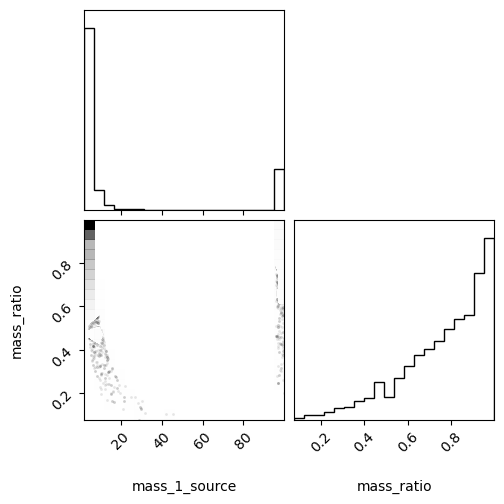

In [145]:
import corner

corner.corner(dff[["mass_1_source", "mass_ratio"]].values, 
              labels=dff[["mass_1_source", "mass_ratio"]].columns, plot_contours=False);

In [46]:
AA = (I.selection_data["mass_1_source"] == I.selection_data["mass_1_source"].min())

SM(I.selection_data, Lambda_0)

Array([0.00017551, 0.0083946 , 0.        , ..., 0.13088706, 0.00137557,
       0.00034847], dtype=float32)

In [49]:
I.selection_data['prior']

Array([8.1498072e-08, 2.5253707e-06, 1.7653511e-01, ..., 6.4839269e-06,
       2.0578009e-05, 1.2208021e-07], dtype=float32)

In [12]:
compute_grad_at_point = lambda s: jax.grad(lambda x: jnp.log(SM(s, make_dictionary(x))))(x)

In [13]:
import jax
from gravpop import *
jax.grad(lambda x: x*box(x,0,1))(1.0)

Array(0., dtype=float32, weak_type=True)

In [14]:
compute_grad_at_point({'mass_1_source': 96, 'mass_ratio': 0.99})

Array([nan, nan, nan, nan, nan, nan, nan, nan,  0.], dtype=float32)

## GRADIENT NANS ARE BECAUSE THE POINTS ARE BEYOND THE M_MIN AND M_MAX DOMAINS FOR A GIVEN M_MIN AND M_MAX

## Check power law

In [10]:
ourgrad = jax.grad(lambda x: powerlaw(I.event_data['mass_1_source'], **dict(
	alpha = x[0],
    high = x[1],
    low = x[2])).mean(axis=-1).prod())

cols = ["alpha", "high", "low"]
my_params = {'alpha': 2.01, 'high':100, "low":5}
x = jnp.array([my_params[col] if col in my_params else Lambda_0[col] for col in cols])
ourgrad(x)

Array([0., 0., 0.], dtype=float32)

In [14]:
HL_mine = PopulationLikelihood(
						 models  = [SM],
					     event_data = I.event_data,
					     selection_data = I.selection_data
					     )

compute_gravpop_like = lambda Lambda_0 : jnp.sum(jnp.log((SM(I.event_data, Lambda_0)/I.event_data["prior"]).mean(axis=-1))) \
- 69*jnp.sum(jnp.log((SM(I.selection_data, Lambda_0)/I.selection_data["prior"]).mean(axis=-1)))

ourgrad = jax.grad(lambda x: SM({'mass_1_source': 50, 'mass_ratio': 0.9}, dict(
	alpha = x[0],
    lam = x[1],
    mmin = x[2],
    mmax = x[3],
    beta = x[4],
    mpp = x[5],
    sigpp = x[6],
    delta_m = x[7], lamb=x[8])).sum())


cols = ["alpha", "lam", "mmin", "mmax", "beta", "mpp", "sigpp", "delta_m", "lamb"]
my_params = {'alpha': 2.0}
x = jnp.array([my_params[col] if col in my_params else Lambda_0[col] for col in cols])
ourgrad(x)

Array([-6.2673423e-03, -6.5341378e-03,  8.6709816e-04, -1.4360785e-07,
        1.7170139e-03,  8.1502558e-06,  2.8390070e-05,  3.8756849e-04,
        0.0000000e+00], dtype=float32)

## Two component single is differentiable

In [122]:
ourgrad = jax.grad(lambda x: two_component_single(31, **dict(
	alpha = x[0],
    lam = x[1],
    mmin = x[2],
    mmax = x[3],
    mpp = x[4],
    sigpp = x[5])))



cols = ["alpha", "lam", "mmin", "mmax", "mpp", "sigpp"]
my_params = {'alpha': 2.01, 'lam':0.04, "mpp":30}
x = jnp.array([my_params[col] if col in my_params else Lambda_0[col] for col in cols])
ourgrad(x)

Array([-5.1747290e-03,  9.1232277e-02,  1.1100381e-03, -2.9234955e-06,
        2.4166756e-04, -9.0625341e-04], dtype=float32)

## Truncnorm is differentiable

In [102]:
@jit
def truncnorm(x, mu, sigma, high, low):
    norm = 2**0.5 / jnp.pi**0.5 / sigma
    norm /= jax.scipy.special.erf((high - mu) / 2**0.5 / sigma) + jax.scipy.special.erf(
        (mu - low) / 2**0.5 / sigma
    )
    prob = jnp.exp(-jnp.power(x - mu, 2) / (2 * sigma**2))
    prob *= norm*box(x, low, high)
    return prob

initial_function = lambda x: truncnorm(40, **dict(
	mu = x[0],
    sigma = x[1],
    high = x[2],
    low = x[3]))
ourgrad = jax.grad(initial_function)



cols = ["mu", "sigma", "high", "low"]
my_params = {'mu': 20.0, 'sigma': 10.0, 'high':100, 'low':5}
x = jnp.array([my_params[col] if col in my_params else Lambda_0[col] for col in cols])
print(initial_function(x))
ourgrad(x)

0.0057856175


Array([ 1.0768250e-03,  1.8561329e-03, -3.1323179e-18,  8.0298458e-05],      dtype=float32)

In [80]:
two_component_single(mass, alpha, lam, mmin, mmax, mpp, sigpp, gaussian_mass_maximum=100)

<function gravpop.models.mass.mass.two_component_single(mass, alpha, lam, mmin, mmax, mpp, sigpp, gaussian_mass_maximum=100)>

In [47]:
HL_other.logpdf(Lambda_0)

Array(-796.2102, dtype=float32)

In [32]:
HL_other.logpdf(Lambda_0) - HL_other.logpdf(Lambda_1), HL_mine.logpdf(Lambda_0) - HL_mine.logpdf(Lambda_1)

(Array(69.256836, dtype=float32), Array(69.270386, dtype=float32))

In [43]:
test = lambda alpha : HL_mine.logpdf(dict(alpha = alpha, lam = 0.04,mmin = 5,mmax = 90,beta = 1.1,mpp = 35,sigpp = 4, delta_m = 3, lamb=2.9))


import matplotlib.pyplot as plt

alphas = np.linspace(1,4,100)
test_alphas = np.array([test(a) for a in alphas])

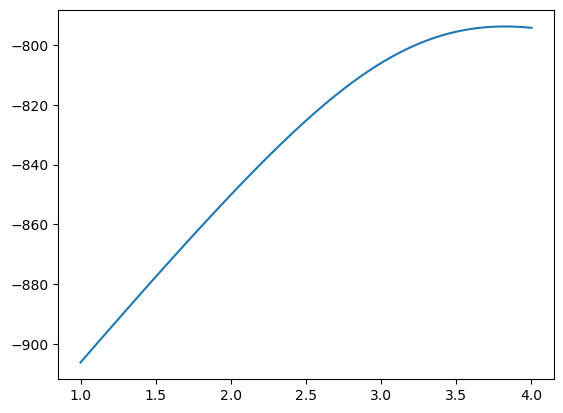

In [44]:
plt.plot(alphas, test_alphas)

In [101]:
data = {'mass_1_source' : jnp.linspace(5,100,200), 'mass_ratio': jnp.linspace(0.0,1, 100)}
data['mass_1_source'], data['mass_ratio'] = jnp.meshgrid(data['mass_1_source'], data['mass_ratio'])
SM(data, Lambda_0)

Array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 2.1901273e-05, 2.7161593e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.6213273e-05, 3.5260409e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [154]:
import gravpop
def norm_p_q(beta, mmin, delta_m, m1_grid, q_grid, m1s, qs):
        """Calculate the mass ratio normalisation by linear interpolation"""
        p_q = powerlaw(q_grid, beta, 1, mmin / m1_grid)
        #print(p_q)
        p_q *= gravpop.smoothing(
            m1_grid * q_grid, mmin=mmin, mmax=m1_grid, delta_m=delta_m
        )
        
        norms = jnp.where(
            jnp.array(delta_m) > 0,
            jax.scipy.integrate.trapezoid(jnp.nan_to_num(p_q),  qs, axis=0),
            jnp.ones(m1s.shape),
        )

        return norms

    
m1s = jnp.linspace(5,100,200)
qs = jnp.linspace(0,1,100)
m1_grid, q_grid = jnp.meshgrid(m1s, qs)
#print(m1_grid, q_grid)
#print(powerlaw(m1_grid, 1.1, 1, 5 / m1_grid))
Ns = norm_p_q(1.1, 5, 0.3, m1_grid, q_grid, m1s, qs)


Ns.shape
#plt.plot(jnp.linspace(5,100,200), Ns)
#fig, axes = plt.subplots(ncols=1, figsize=(10,5))
#axes.contourf(data['mass_1_source'], data['mass_ratio'], Ns)
#plt.show()

(200,)

In [156]:
m1s = jnp.linspace(5,100,200)
qs = jnp.linspace(0,1,100)
m1_grid, q_grid = jnp.meshgrid(m1s, qs)

Ns = norm_p_q(1.1, 5, 0.3, m1_grid, q_grid, m1s, qs)

jnp.interp(data["mass_1_source"], m1s, Ns)

Array([[0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846],
       [0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846],
       [0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846],
       ...,
       [0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846],
       [0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846],
       [0.        , 0.6354313 , 0.8208466 , ..., 0.98897886, 0.98896   ,
        0.98894846]], dtype=float32)

In [86]:
sampler = Sampler(
    priors = priors,
    latex_symbols = latex_symbols,
    likelihood = HL,
    num_samples = 2000,
    num_warmup = 200,
    target_accept_prob = 0.6
)

sampler.sample()

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

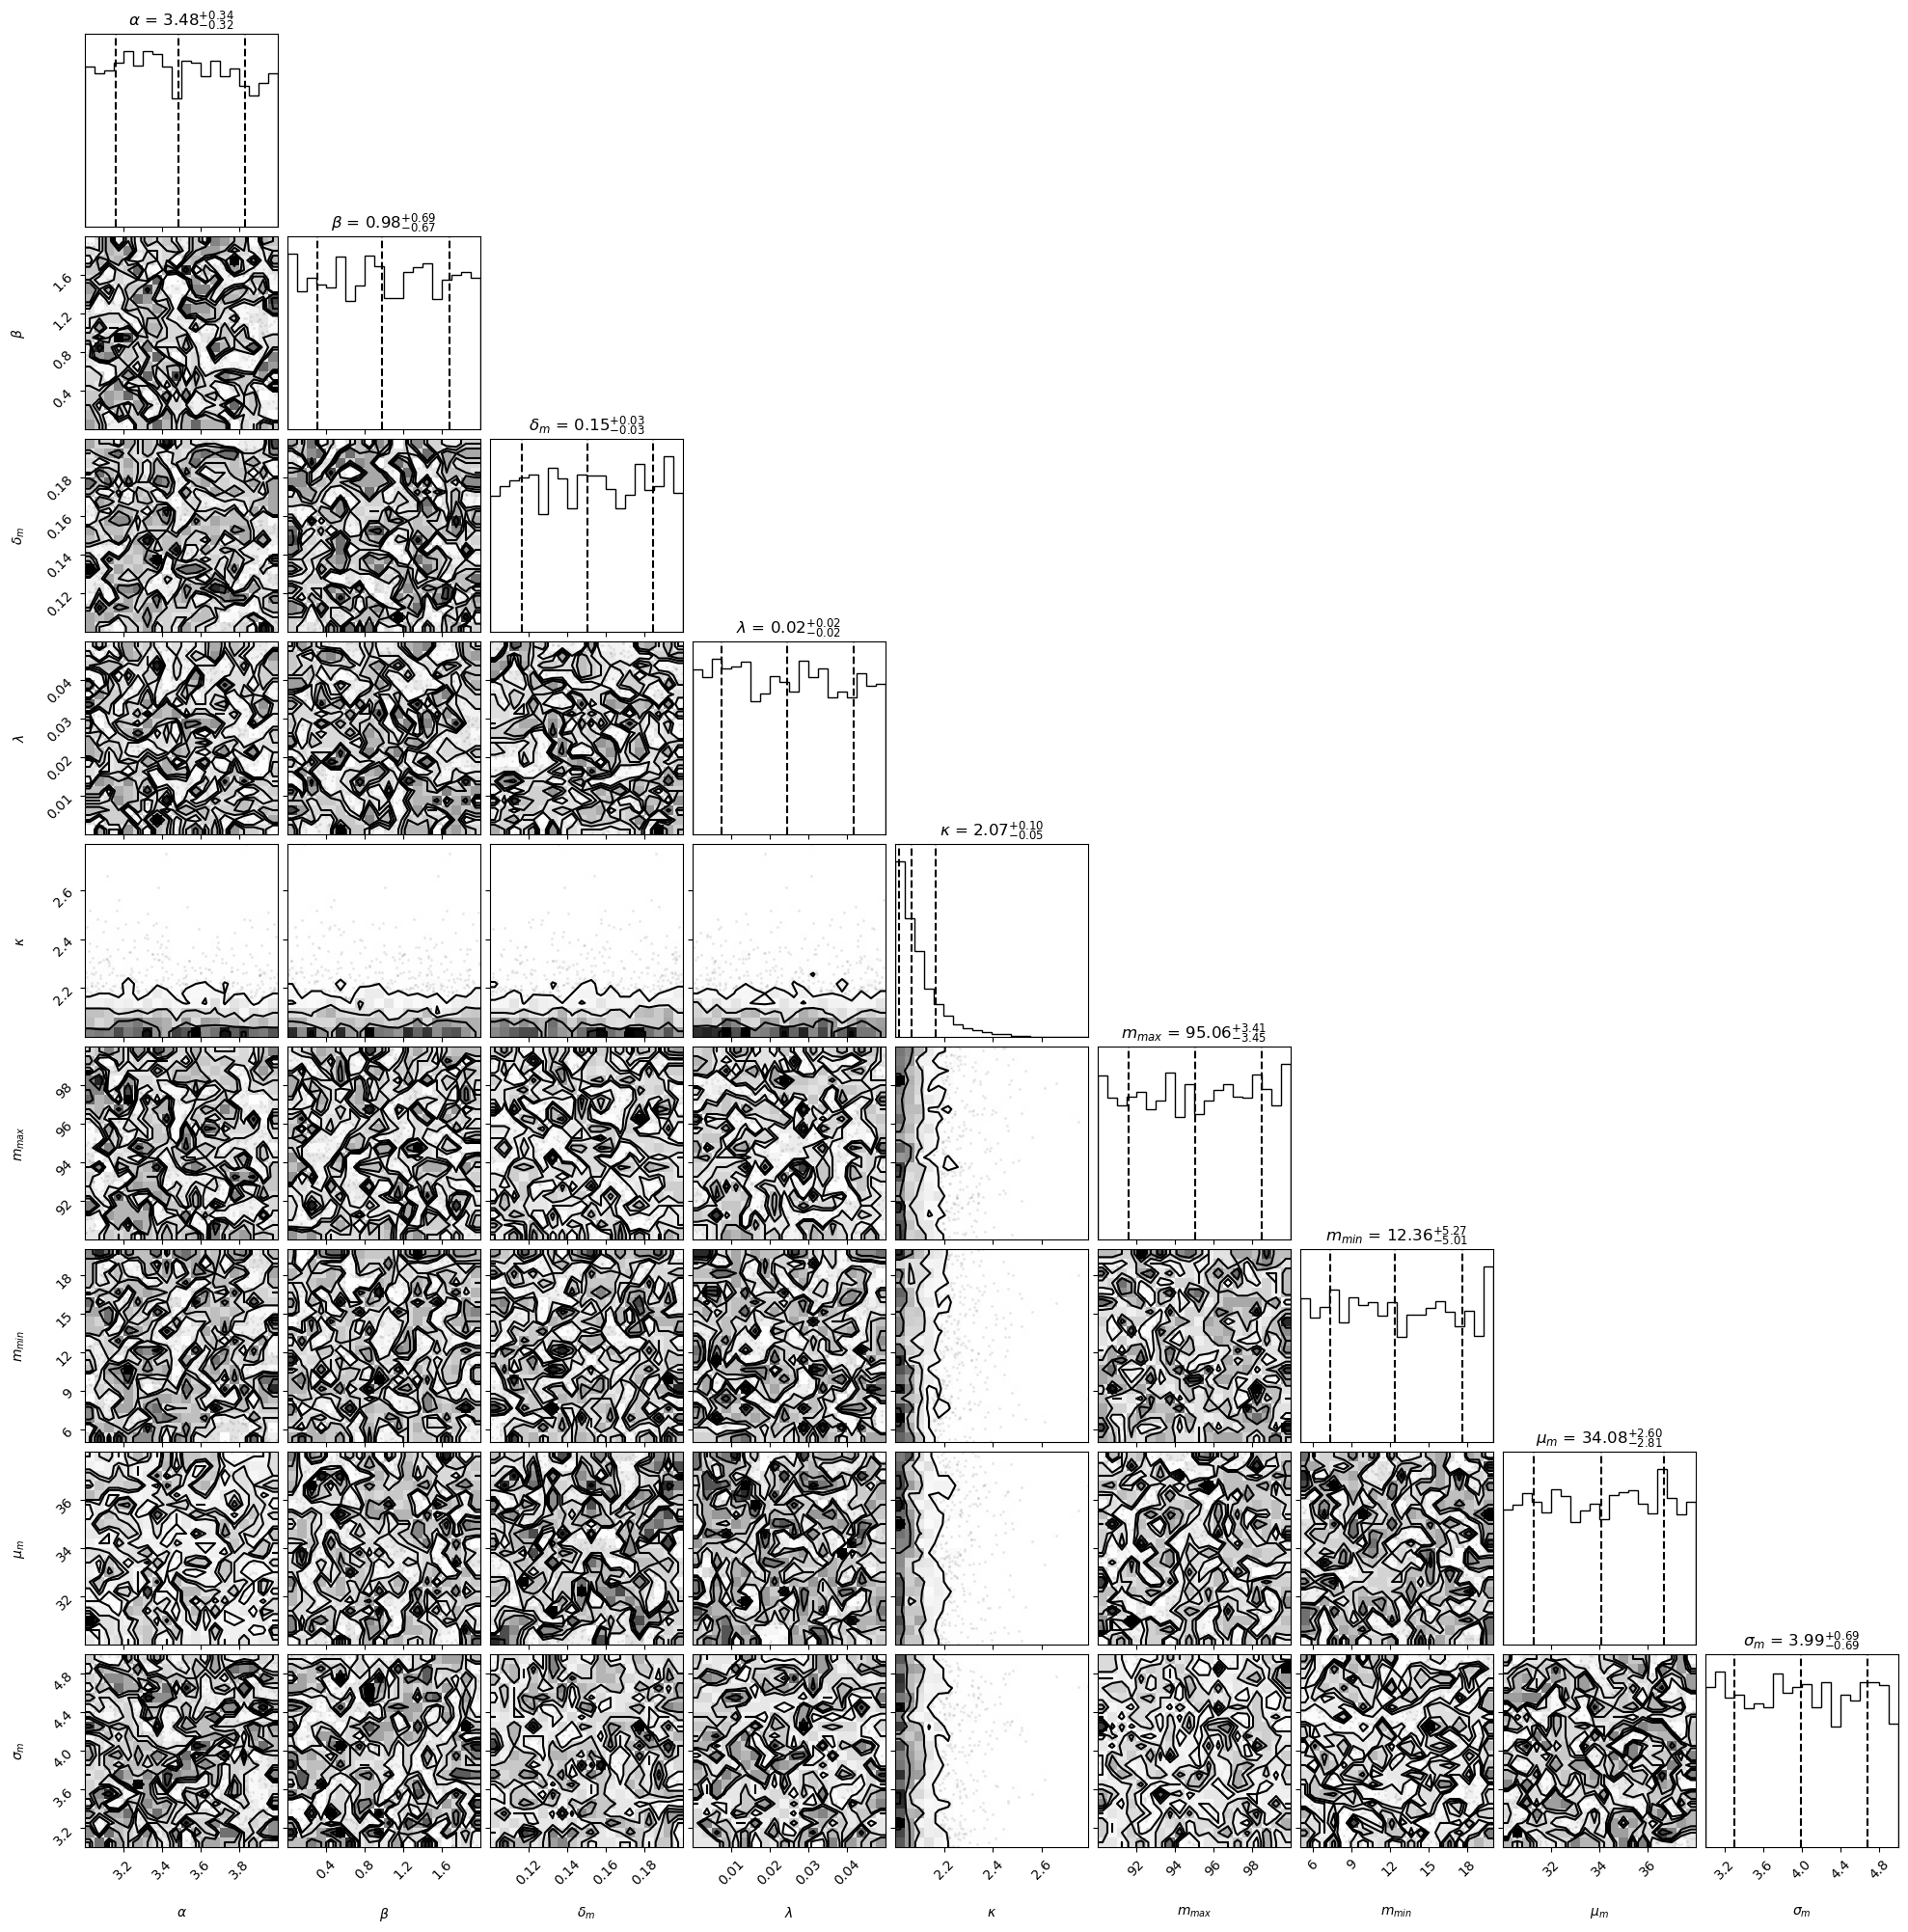

In [17]:
sampler.corner();

In [48]:
import inspect


print(inspect.getsource(HL.sampled_event_bayes_factors))

NameError: name 'HL' is not defined